# Red Wine Quality Prediction

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from  sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

## Reading Dataset

In [2]:
df=pd.read_csv("ML6 SVM Red wine Quality.csv")

In [3]:
df.head()

,Quality_Category,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
0,0,0.30,0.34,1.6,0.049,14,132,0.994,0.49,9.5
1,0,0.23,0.32,8.5,0.058,47,186,0.996,0.40,9.9
2,0,0.28,0.40,6.9,0.050,30,97,0.995,0.44,10.1
3,0,0.32,0.16,7.0,0.045,30,136,0.995,0.47,9.6
4,0,0.27,0.36,20.7,0.045,45,170,1.001,0.45,8.8


In [4]:
df.shape

(4894, 10)

### Getting Information Of Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Quality_Category    4894 non-null   int64  
 1   volatileacidity     4894 non-null   float64
 2   citricacid          4894 non-null   float64
 3   residualsugar       4894 non-null   float64
 4   chlorides           4894 non-null   float64
 5   freesulfurdioxide   4894 non-null   int64  
 6   totalsulfurdioxide  4894 non-null   int64  
 7   density             4894 non-null   float64
 8   sulphates           4894 non-null   float64
 9   alcohol             4894 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 382.5 KB


In [6]:
df.describe()

,Quality_Category,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
count,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000
mean,0.216387,0.278335,0.334146,6.391582,0.045773,35.311606,138.368615,0.994048,0.489904,10.514610
std,0.411823,0.100801,0.121047,5.071695,0.021855,17.019553,42.498278,0.003007,0.114153,1.230665
min,0.000000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987000,0.220000,8.000000
25%,0.000000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.992000,0.410000,9.500000
50%,0.000000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.994000,0.470000,10.400000
75%,0.000000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996000,0.550000,11.400000
max,1.000000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.039000,1.080000,14.200000


In [7]:
df.isna().sum()

Quality_Category      0
volatileacidity       0
citricacid            0
residualsugar         0
chlorides             0
freesulfurdioxide     0
totalsulfurdioxide    0
density               0
sulphates             0
alcohol               0
dtype: int64

### There is No null Values

## EDA

In [8]:
df.columns

Index(['Quality_Category', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density',
       'sulphates', 'alcohol'],
      dtype='object')

<AxesSubplot:>

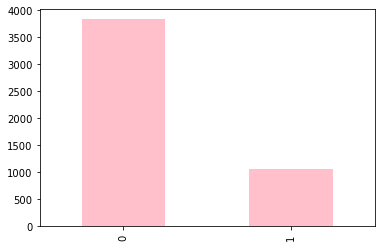

In [9]:
df["Quality_Category"].value_counts().plot(kind='bar',color='pink')

<AxesSubplot:xlabel='volatileacidity', ylabel='citricacid'>

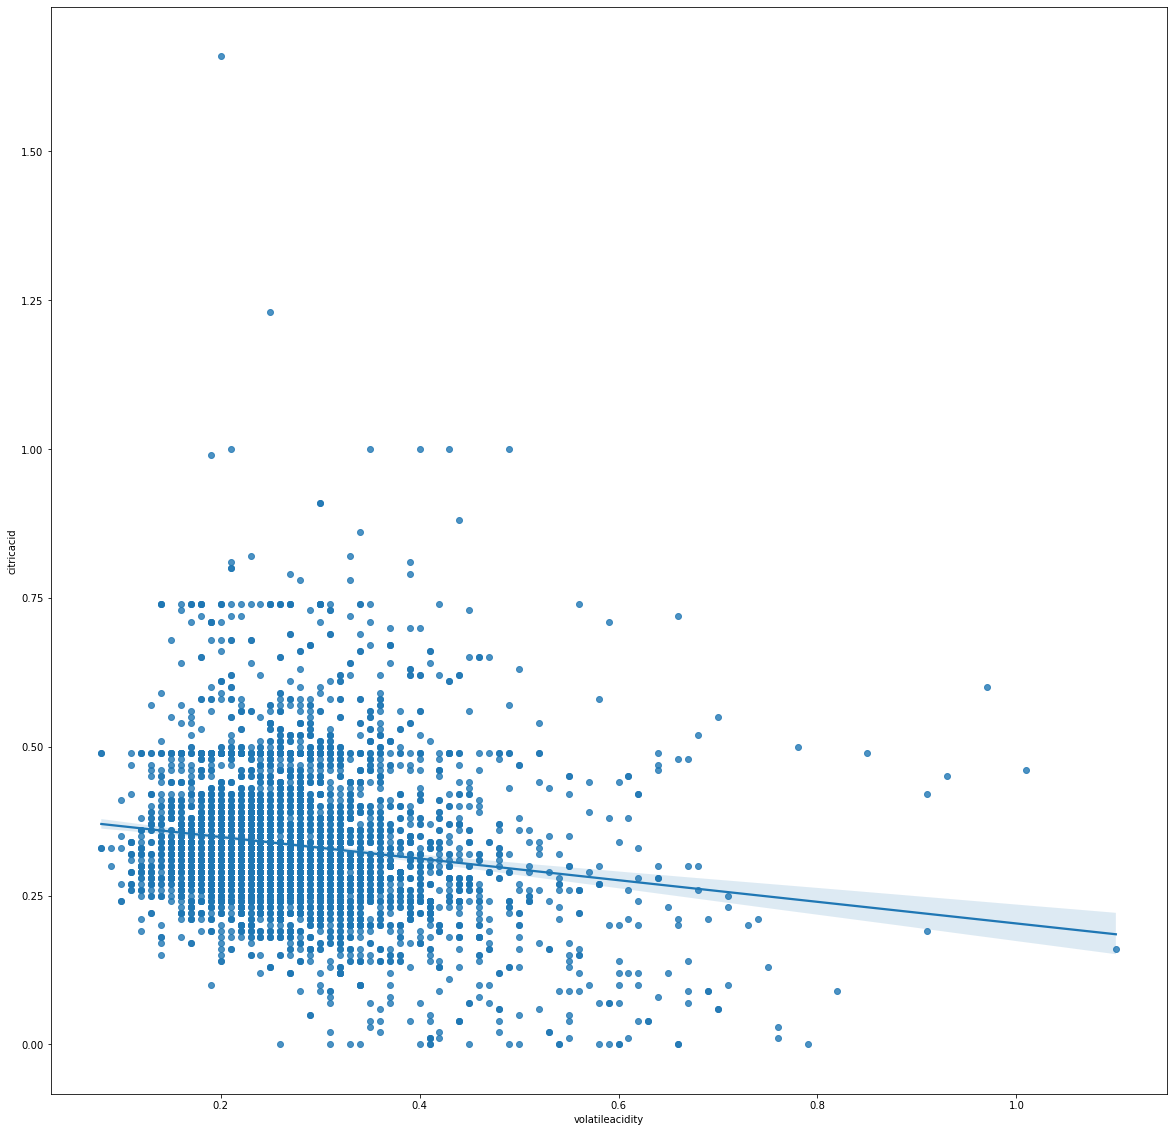

In [10]:
plt.figure(figsize=(20,20))
sns.regplot(data=df,x="volatileacidity",y='citricacid')

<AxesSubplot:xlabel='residualsugar', ylabel='chlorides'>

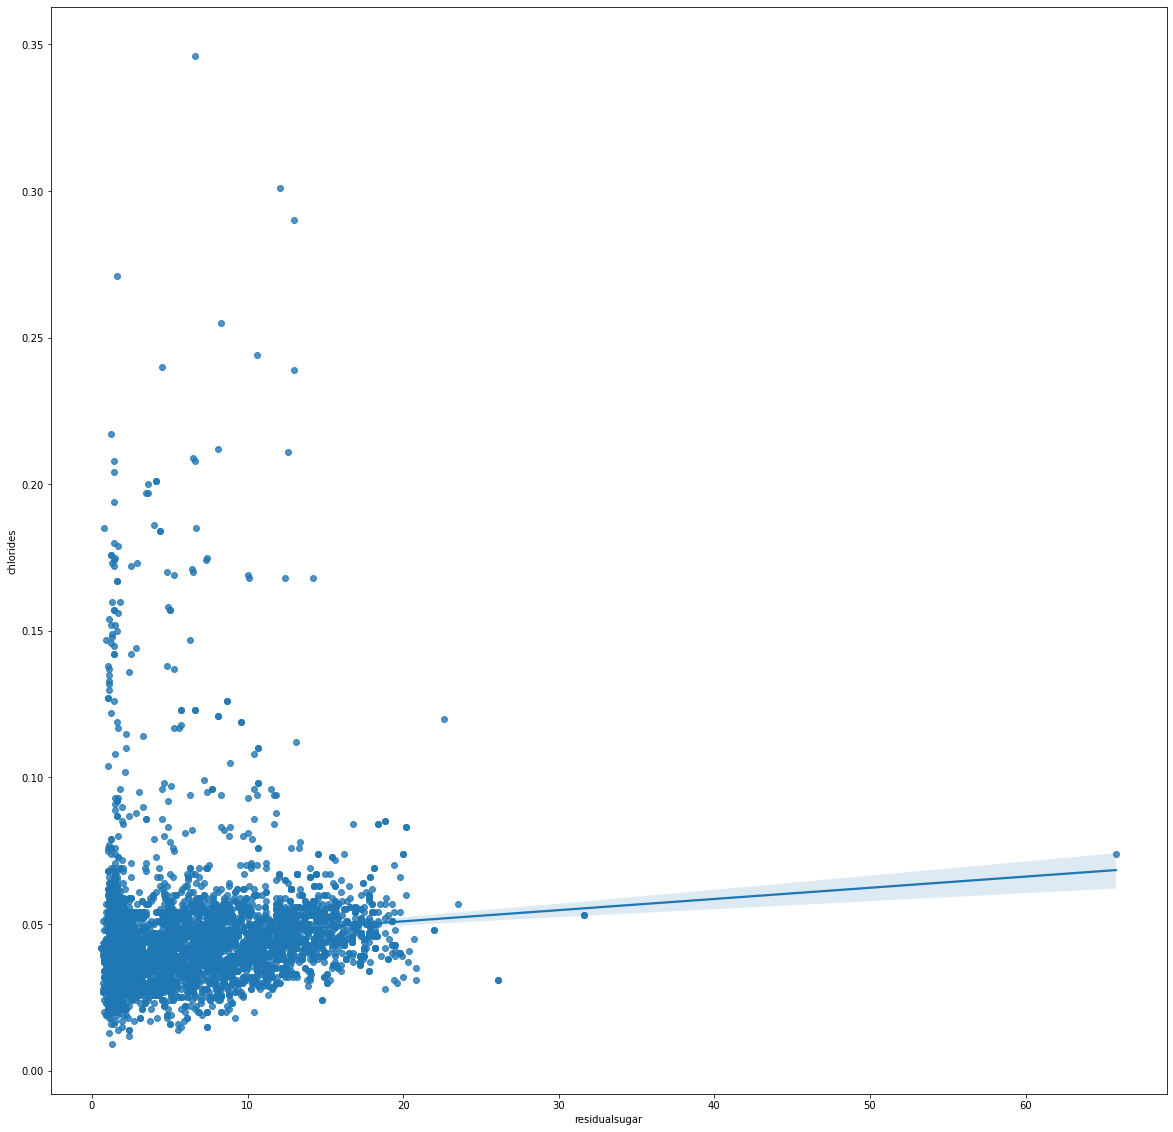

In [11]:
plt.figure(figsize=(20,20))
sns.regplot(data=df,x="residualsugar",y='chlorides')

<AxesSubplot:xlabel='sulphates', ylabel='alcohol'>

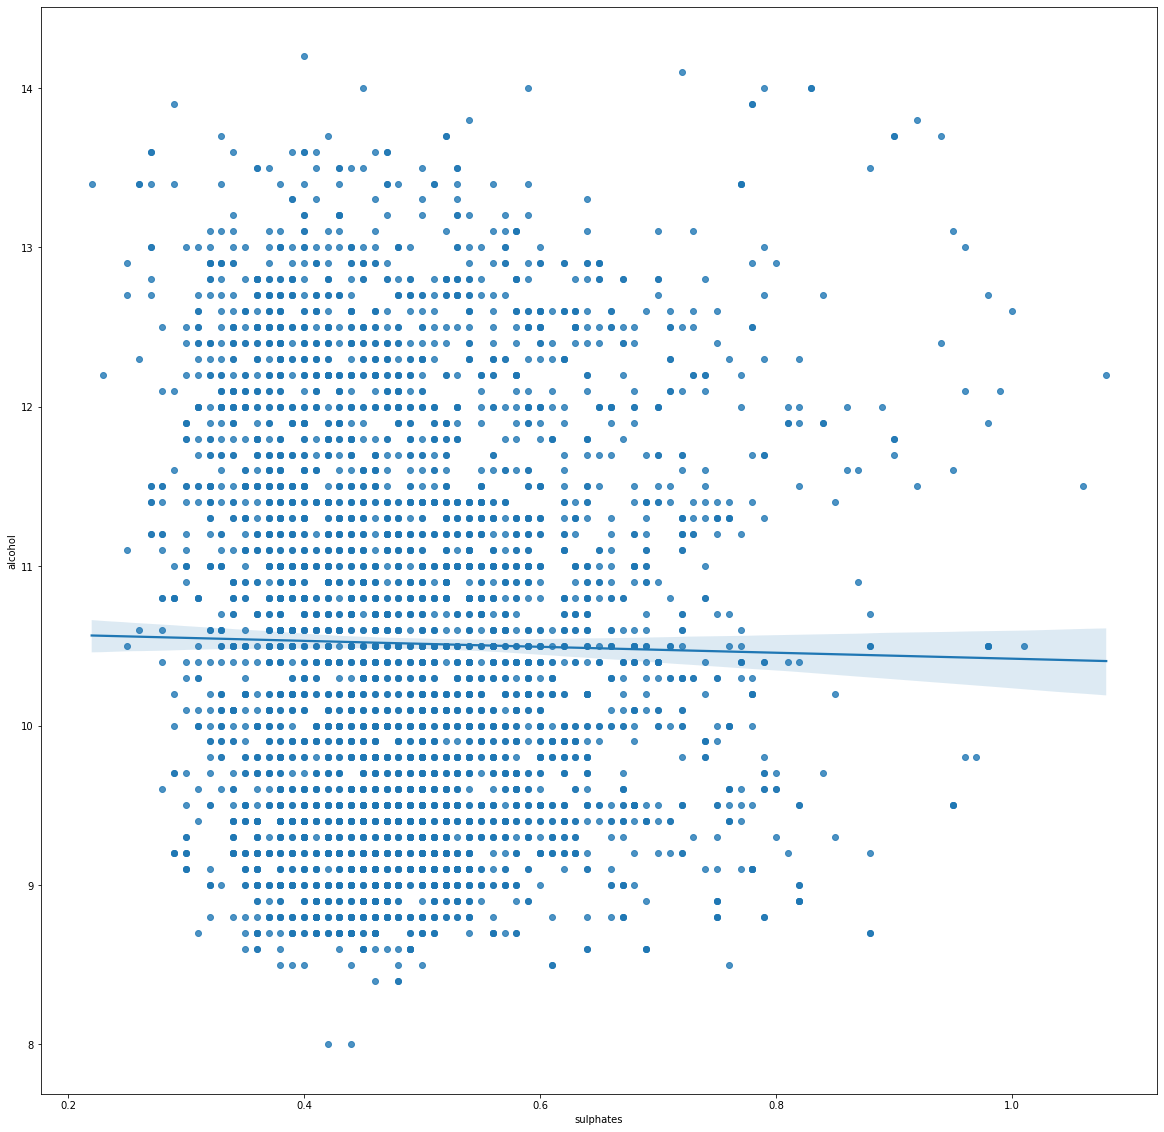

In [12]:
plt.figure(figsize=(20,20))
sns.regplot(data=df,x="sulphates",y='alcohol')

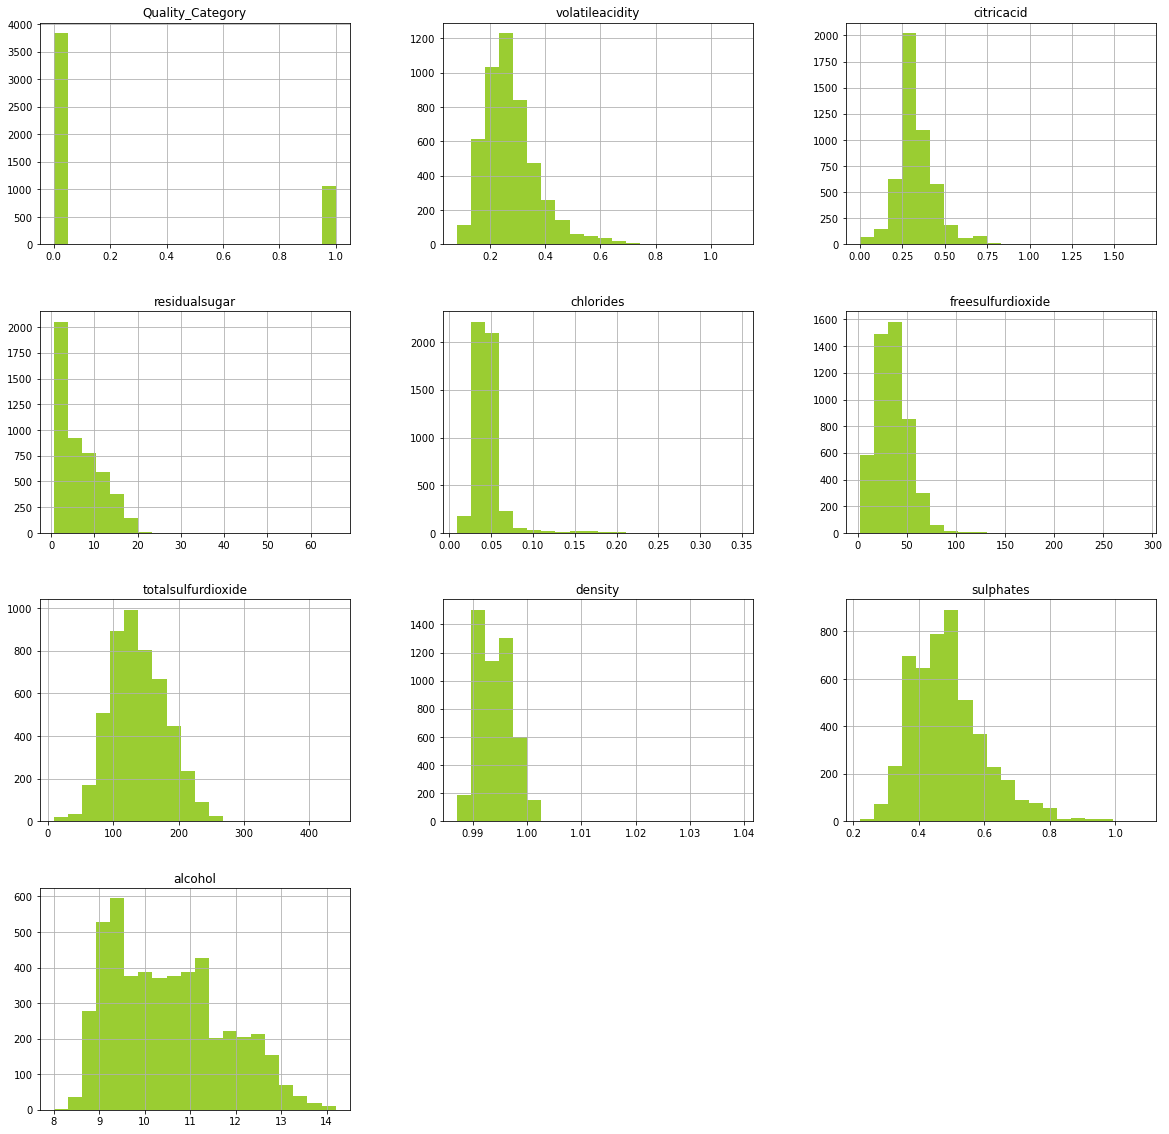

In [13]:
df.hist(bins=20,color='yellowgreen',figsize=(20,20));

### Defining objects for  Features and Target 

In [14]:
features=df.drop(["Quality_Category"],axis=1)

In [15]:
target=df["Quality_Category"]

In [16]:
features_train, features_test, target_train, target_test = train_test_split(features,target, test_size=0.2,random_state=2)

### Without Scaling

## Model  SVM 

In [17]:
model=SVC()

In [18]:
model.fit(features_train,target_train)

SVC()

In [19]:
predicted_category=model.predict(features_test)

#### Checking Accuracy ,Recall ,Precision ,F1 Score And Confusion Matrix of Model

In [20]:
print("Training Accuracy of Model is",model.score(features_train,target_train))

Training Accuracy of Model is 0.7851851851851852


In [21]:
print("Testing Accuracy of Model is",model.score(features_test,target_test))

Testing Accuracy of Model is 0.7773237997957099


[[761   0]
 [218   0]]


<AxesSubplot:>

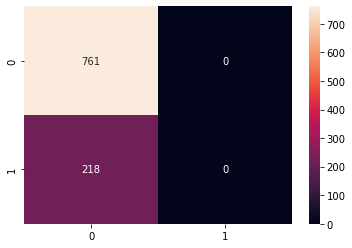

In [22]:
cm=confusion_matrix(target_test,predicted_category)
print(cm)
sns.heatmap(cm,annot=True,fmt='d')

In [23]:
print("Recall Score of Model is",recall_score(target_test,predicted_category))

Recall Score of Model is 0.0


In [24]:
print("Precision Score of Model is",precision_score(target_test,predicted_category))

Precision Score of Model is 0.0


In [25]:
print("F1 Score of Model is",f1_score(target_test,predicted_category))

F1 Score of Model is 0.0


In [26]:
    print(classification_report(target_test,predicted_category))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87       761
           1       0.00      0.00      0.00       218

    accuracy                           0.78       979
   macro avg       0.39      0.50      0.44       979
weighted avg       0.60      0.78      0.68       979



## Applying all Algorithm

In [27]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [28]:
models={'lr':LogisticRegression(),
        'sg':SGDClassifier(),
        'tree':DecisionTreeClassifier(),
        'rf':RandomForestClassifier(),
        'gb':GradientBoostingClassifier(),
        'knn':KNeighborsClassifier(),
        'svm':SVC(),
        'ad':AdaBoostClassifier(),
        'nb':GaussianNB(),
        'lda':LinearDiscriminantAnalysis(),
        'qda':QuadraticDiscriminantAnalysis()
       }

In [29]:
for name, model in models.items():
    model1=model.fit(features_train,target_train)
    y_pred = model1.predict(features_test)
    print(f"{name} confuion matrix: \n {confusion_matrix(target_test,y_pred)}") 
    print(f'{name} accuracy score: {model1.score(features_test,target_test)}')
    print(f'{name} precision score: {precision_score(target_test,y_pred)}')
    print(f'{name} recall score: {recall_score(target_test,y_pred)}')
    print(f'{name} classification report :\n {classification_report(target_test,y_pred)}\n\n')

lr confuion matrix: 
 [[730  31]
 [168  50]]
lr accuracy score: 0.7967313585291114
lr precision score: 0.6172839506172839
lr recall score: 0.22935779816513763
lr classification report :
               precision    recall  f1-score   support

           0       0.81      0.96      0.88       761
           1       0.62      0.23      0.33       218

    accuracy                           0.80       979
   macro avg       0.72      0.59      0.61       979
weighted avg       0.77      0.80      0.76       979



sg confuion matrix: 
 [[755   6]
 [218   0]]
sg accuracy score: 0.7711950970377937
sg precision score: 0.0
sg recall score: 0.0
sg classification report :
               precision    recall  f1-score   support

           0       0.78      0.99      0.87       761
           1       0.00      0.00      0.00       218

    accuracy                           0.77       979
   macro avg       0.39      0.50      0.44       979
weighted avg       0.60      0.77      0.68       979




# Scaling

In [30]:
features=df.drop(["Quality_Category"],axis=1)

In [31]:
target=df["Quality_Category"]

In [32]:
col=features_train.columns
col

Index(['volatileacidity', 'citricacid', 'residualsugar', 'chlorides',
       'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'sulphates',
       'alcohol'],
      dtype='object')

In [33]:
rob_scaler=RobustScaler()
std_scaler=StandardScaler()

In [34]:
features=std_scaler.fit_transform(features)

In [35]:
features=pd.DataFrame(features,columns=col)

In [36]:
features

,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
0,0.214954,0.048367,-0.944866,0.147691,-1.252312,-0.149871,-0.016107,0.000841,-0.824525
1,-0.479557,-0.116875,0.415765,0.559542,0.686833,1.120898,0.649085,-0.787657,-0.499464
2,0.016522,0.544093,0.100257,0.193452,-0.312120,-0.973518,0.316489,-0.437213,-0.336933
3,0.413386,-1.438811,0.119976,-0.035354,-0.312120,-0.055740,0.316489,-0.174380,-0.743259
4,-0.082693,0.213609,2.821519,-0.035354,0.569309,0.744374,2.312065,-0.349602,-1.393381
...,...,...,...,...,...,...,...,...,...
4889,-0.677989,-0.364738,-0.944866,-0.309921,-0.664692,-1.091182,-1.013894,0.088452,0.556984
4890,0.413386,0.213609,0.317169,0.056168,1.274452,0.697309,0.316489,-0.261991,-0.743259
4891,-0.380341,-1.190948,-1.023743,-0.218399,-0.312120,-0.644059,-0.348702,-0.261991,-0.905790
4892,0.115738,-0.282117,-1.043462,-1.087862,-0.899740,-0.667592,-1.679086,-0.962879,1.857227


In [37]:
features_train, features_test, target_train, target_test = train_test_split(features,target, test_size=0.2,random_state=2)

In [38]:
features_test

,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
622,2.794570,-1.769296,0.790432,2.298468,-0.782216,0.909103,1.314277,-0.349602,-1.149585
3392,0.115738,-0.447359,0.750993,-0.630250,0.451785,-0.008675,0.316489,-0.174380,0.069393
1177,1.405546,0.957199,0.534081,-0.767534,-0.899740,-0.314601,0.649085,-1.138101,-0.336933
3614,-0.082693,-0.777843,1.224256,-0.081115,0.745595,-0.479330,0.981681,0.614118,-0.418199
3520,0.810250,-0.529980,-0.018059,-0.813295,0.275499,-0.149871,-0.681298,-0.787657,0.882044
...,...,...,...,...,...,...,...,...,...
831,1.405546,0.048367,-0.412445,-0.264160,-0.077073,-0.714658,-0.681298,-0.349602,1.857227
4374,0.413386,-1.108327,0.041099,-0.218399,-1.546121,-0.291068,0.316489,0.176063,-1.393381
2328,1.207114,-0.116875,0.829870,0.147691,0.157975,1.662152,1.314277,0.876951,-0.987055
2546,0.512602,-1.604053,-0.313849,0.284974,-0.488406,-0.244002,0.316489,-0.086770,-0.905790


## Model - SVM 

In [39]:
model=SVC()

In [40]:
model.fit(features_train,target_train)

SVC()

In [41]:
predicted_category=model.predict(features_test)

#### Checking Accuracy ,Recall ,Precision ,F1 Score And Confusion Matrix of Model

In [42]:
print("Training Accuracy of Model is",model.score(features_train,target_train))

Training Accuracy of Model is 0.8268199233716476


In [43]:
print("Testing Accuracy of Model is",model.score(features_test,target_test))

Testing Accuracy of Model is 0.8069458631256384


[[732  29]
 [160  58]]


<AxesSubplot:>

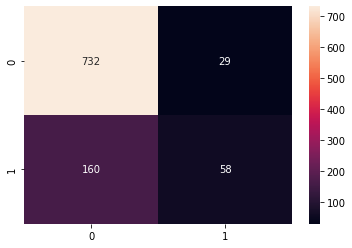

In [44]:
cm=confusion_matrix(target_test,predicted_category)
print(cm)
sns.heatmap(cm,annot=True,fmt='d')

In [45]:
print("Recall Score of Model is",recall_score(target_test,predicted_category))

Recall Score of Model is 0.26605504587155965


In [46]:
print("Precision Score of Model is",precision_score(target_test,predicted_category))

Precision Score of Model is 0.6666666666666666


In [47]:
print("F1 Score of Model is",f1_score(target_test,predicted_category))

F1 Score of Model is 0.380327868852459


In [48]:
    print(classification_report(target_test,predicted_category))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89       761
           1       0.67      0.27      0.38       218

    accuracy                           0.81       979
   macro avg       0.74      0.61      0.63       979
weighted avg       0.79      0.81      0.77       979



## Applying all Algorithm

In [49]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [50]:
models={'lr':LogisticRegression(),
        'sg':SGDClassifier(),
        'tree':DecisionTreeClassifier(),
        'rf':RandomForestClassifier(),
        'gb':GradientBoostingClassifier(),
        'knn':KNeighborsClassifier(),
        'svm':SVC(),
        'ad':AdaBoostClassifier(),
        'nb':GaussianNB(),
        'lda':LinearDiscriminantAnalysis(),
        'qda':QuadraticDiscriminantAnalysis()
       }

In [51]:
for name, model in models.items():
    model1=model.fit(features_train,target_train)
    y_pred = model1.predict(features_test)
    print(f"{name} confuion matrix: \n {confusion_matrix(target_test,y_pred)}") 
    print(f'{name} accuracy score: {model1.score(features_test,target_test)}')
    print(f'{name} precision score: {precision_score(target_test,y_pred)}')
    print(f'{name} recall score: {recall_score(target_test,y_pred)}')
    print(f'{name} classification report :\n {classification_report(target_test,y_pred)}\n\n')

lr confuion matrix: 
 [[719  42]
 [168  50]]
lr accuracy score: 0.7854954034729316
lr precision score: 0.5434782608695652
lr recall score: 0.22935779816513763
lr classification report :
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       761
           1       0.54      0.23      0.32       218

    accuracy                           0.79       979
   macro avg       0.68      0.59      0.60       979
weighted avg       0.75      0.79      0.75       979



sg confuion matrix: 
 [[761   0]
 [218   0]]
sg accuracy score: 0.7773237997957099
sg precision score: 0.0
sg recall score: 0.0
sg classification report :
               precision    recall  f1-score   support

           0       0.78      1.00      0.87       761
           1       0.00      0.00      0.00       218

    accuracy                           0.78       979
   macro avg       0.39      0.50      0.44       979
weighted avg       0.60      0.78      0.68       979




### Random Forest Gives Best Accuracy